In [8]:
#importing libraries
# Data Handling
#import pyodbc
#from dotenv import dotenv_values
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px

# Statistical Analysis
from statsmodels.tsa.stattools import adfuller
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error


# Feature Processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import RandomizedSearchCV
import pickle


# Other Packages
import warnings

warnings.filterwarnings("ignore")

In [9]:
oil_df = pd.read_csv("oil.csv")
holidays_events_df = pd.read_csv("holidays_events.csv")
stores_df = pd.read_csv("stores.csv")

In [10]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [11]:
holidays_events_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [12]:
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


**Loading train and test dataset**

In [13]:
train_df = pd.read_csv("train.csv")
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [14]:
test_df = pd.read_csv("test.csv")
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [15]:
#Transaction dataset
transactions_df = pd.read_csv("transactions.csv")
transactions_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


## Hypothesis
The promotional activities, oil prices, and holidays/events have a significant impact on store sales for Corporation Favorita.

**Null Hypothesis (H0):** The promotional activities, oil prices, and holidays/events do not have a significant impact on store sales for Corporation Favorita.

**Alternative Hypothesis (H1):** The promotional activities, oil prices, and holidays/events have a significant impact on store sales for Corporation Favorita.

## Data preprocessing, cleaning and EDA

In [16]:
print(f"Train Dataset: {train_df.shape}")
print(f"Test Datasets: {test_df.shape}")

Train Dataset: (3000888, 6)
Test Datasets: (28512, 5)


So Train dataset contains 3000888 rows and 6 columns and test dataset contains 28512 rows and 5 columns

In [17]:
print("Shapes of Each Dataset:")
print(f"Holiday Events Dataset: {holidays_events_df.shape}")
print(f"Oil Dataset: {oil_df.shape}")
print(f"Stores Dataset: {stores_df.shape}")
print(f"Transactions Dataset: {transactions_df.shape}")

Shapes of Each Dataset:
Holiday Events Dataset: (350, 6)
Oil Dataset: (1218, 2)
Stores Dataset: (54, 5)
Transactions Dataset: (83488, 3)


oil dataset contains information about daily oil prices.<br>stores dataset contains information about store's location, type and clusters.<br>transaction dataset describes number of transactions made at each store on spcific dates.

In [18]:
#column info of each dataset
train_df.info()
print("-"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [19]:
oil_df.info()
print("-"*40)
holidays_events_df.info()
print("-"*40)
stores_df.info()
print("-"*40)
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column

In [20]:
#changing datatype of data column from objec to datetime
# Train dataset
train_df['date'] = pd.to_datetime(train_df['date'])

# Test dataset
test_df['date'] = pd.to_datetime(test_df['date'])

# Holiday Events dataset
holidays_events_df['date'] = pd.to_datetime(holidays_events_df['date'])

# Oil dataset
oil_df['date'] = pd.to_datetime(oil_df['date'])

# Transactions dataset
transactions_df['date'] = pd.to_datetime(transactions_df['date'])

In [21]:
print("Train dataset:", train_df['date'].dtype)
print("Test dataset:", test_df['date'].dtype)
print("Holiday Events dataset:", holidays_events_df['date'].dtype)
print("Oil dataset:", oil_df['date'].dtype)
print("Transactions dataset:", transactions_df['date'].dtype)

Train dataset: datetime64[ns]
Test dataset: datetime64[ns]
Holiday Events dataset: datetime64[ns]
Oil dataset: datetime64[ns]
Transactions dataset: datetime64[ns]


**Checking and handling missing values**

In [22]:
datasets = {'train': train_df, 'test': test_df, 'holiday events': holidays_events_df, 'oil': oil_df, 'stores': stores_df, 'transactions': transactions_df, }

def missing_value_printer(datasets):
    for name, data in datasets.items():
        print(f"missing value in {name} dataset")
        print(data.isnull().sum())
        print(18*"=")
        print()

missing_value_printer(datasets)

missing value in train dataset
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

missing value in test dataset
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

missing value in holiday events dataset
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

missing value in oil dataset
date           0
dcoilwtico    43
dtype: int64

missing value in stores dataset
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

missing value in transactions dataset
date            0
store_nbr       0
transactions    0
dtype: int64



dcoilwtico (daily crude oil prices) column in the Oil dataset has 43 missing values

**Handling missing values**<br> using backfill strategy to fill the null values, in backfill strategy we fill the null value with recent previous non null value which is appropriate for oilpricing

In [23]:
# Visualizing the 'dcoilwtico' column to Identify a Strategy for Handling Missing Values
fig = px.line(oil_df, x='date', y='dcoilwtico')
fig.update_layout(title='Trend of Oil Prices Over Time', title_x=0.5, xaxis_title='Date', yaxis_title='Oil Price')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [24]:
# Fill missing values in the 'dcoilwtico' column using backfill strategy
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].fillna(method='backfill')

In [25]:
print(oil_df['dcoilwtico'].isnull().sum())


0


**Checking the missing dates in train dataset**

In [26]:
date_small=train_df['date'].min()
date_large= train_df['date'].max()
expected_dates = pd.date_range(start=date_small, end=date_large)
missing_dates = expected_dates[~expected_dates.isin(train_df['date'])]
print(missing_dates)

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [27]:
# Complete the missing dates in the train dataset
# Create an index of the missing dates as a DatetimeIndex object
missing_dates = pd.Index(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]')

# Create a DataFrame with the missing dates, using the 'date' column
missing_data = pd.DataFrame({'date': missing_dates})

# Concatenate the original train dataset and the missing data DataFrame (row wise concatenation)
# ignore_index=True ensures a new index is assigned to the resulting DataFrame
train_df = pd.concat([train_df, missing_data], ignore_index=True)

# Sort the DataFrame based on the 'date' column in ascending order
train_df.sort_values('date', inplace=True)

In [28]:
#confirm the dates are complete
date_small=train_df['date'].min()
date_large= train_df['date'].max()
expected_dates = pd.date_range(start=date_small, end=date_large)
missing_dates = expected_dates[~expected_dates.isin(train_df['date'])]
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [29]:
#import pandas as pd

# Sample DataFrames
customers_df = pd.DataFrame({'customer_id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie'], 'email': ['alice@example.com', 'bob@example.com', 'charlie@example.com']})
orders_df = pd.DataFrame({'order_id': [100, 101, 102, 103], 'customer_id': [1, 1, 2, 3], 'product': ['Laptop', 'Phone', 'Headphones', 'Tablet'], 'price': [1000, 500, 100, 200]})

# Inner Join (default) - Keeps rows with matching customer_id
merged_df = customers_df.merge(orders_df, on='customer_id')
print(merged_df)


   customer_id     name                email  order_id     product  price
0            1    Alice    alice@example.com       100      Laptop   1000
1            1    Alice    alice@example.com       101       Phone    500
2            2      Bob      bob@example.com       102  Headphones    100
3            3  Charlie  charlie@example.com       103      Tablet    200


In [30]:
# Merging the common columns ('store_nbr' and 'date') in the datasets using the inner merge() function
# Merge train_df with stores_df based on 'store_nbr' column
merged_df1 = train_df.merge(stores_df, on='store_nbr', how='inner')

# Merge merged_df1 with transactions_df based on 'date' and 'store_nbr' columns
merged_df2 = merged_df1.merge(transactions_df, on=['date', 'store_nbr'], how='inner')

# Merge merged_df2 with holidays_events_df based on 'date' column
merged_df3 = merged_df2.merge(holidays_events_df, on='date', how='inner')

# Merge merged_df3 with oil_df based on 'date' column
merged_df = merged_df3.merge(oil_df, on='date', how='inner')

# View the first five rows of the merged dataset
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico
0,73062.0,2013-02-11,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
1,73085.0,2013-02-11,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
2,73084.0,2013-02-11,1.0,"LIQUOR,WINE,BEER",21.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
3,73083.0,2013-02-11,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
4,73082.0,2013-02-11,1.0,LAWN AND GARDEN,3.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01


In [31]:
merged_df_copy = merged_df.copy()
merged_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  float64       
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  float64       
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  float64       
 6   city          322047 non-null  object        
 7   state         322047 non-null  object        
 8   type_x        322047 non-null  object        
 9   cluster       322047 non-null  int64         
 10  transactions  322047 non-null  int64         
 11  type_y        322047 non-null  object        
 12  locale        322047 non-null  object        
 13  locale_name   322047 non-null  object        
 14  description   322047 non-null  object        
 15  transferred   322

## Analysis

In [32]:
#Trend of sales over time
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico
0,73062.0,2013-02-11,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
1,73085.0,2013-02-11,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
2,73084.0,2013-02-11,1.0,"LIQUOR,WINE,BEER",21.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
3,73083.0,2013-02-11,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
4,73082.0,2013-02-11,1.0,LAWN AND GARDEN,3.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01


In [33]:
# Renaming the columns with the approapriate names
merged_df = merged_df.rename(columns={"type_x": "store_type", "type_y": "holiday_type"})
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico
0,73062.0,2013-02-11,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
1,73085.0,2013-02-11,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
2,73084.0,2013-02-11,1.0,"LIQUOR,WINE,BEER",21.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
3,73083.0,2013-02-11,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
4,73082.0,2013-02-11,1.0,LAWN AND GARDEN,3.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01


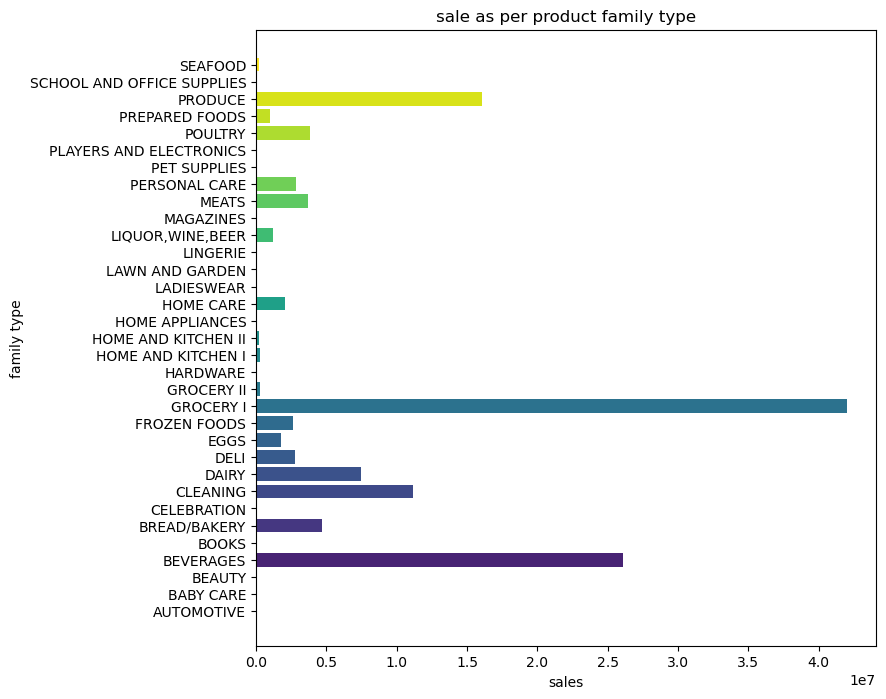

In [34]:
#calculate the total sale per family type
family_type_counts= merged_df['family'].value_counts()
family_type_sales = merged_df.groupby('family')['sales'].sum()
#print(family_type_counts)
#print(family_type_sales)
# Define colors for the bar plot using 'viridis' color palette
colors = cm.viridis(np.linspace(0, 1, len(family_type_sales)))

# Plot the average sales by city horizontally
plt.figure(figsize=(8, 8))
plt.barh(family_type_sales.index, family_type_sales.values, color=colors)
plt.xlabel('sales')
plt.ylabel('family type')
plt.title('sale as per product family type')
plt.show()

from above chart we can easily see which category of products sells the most.

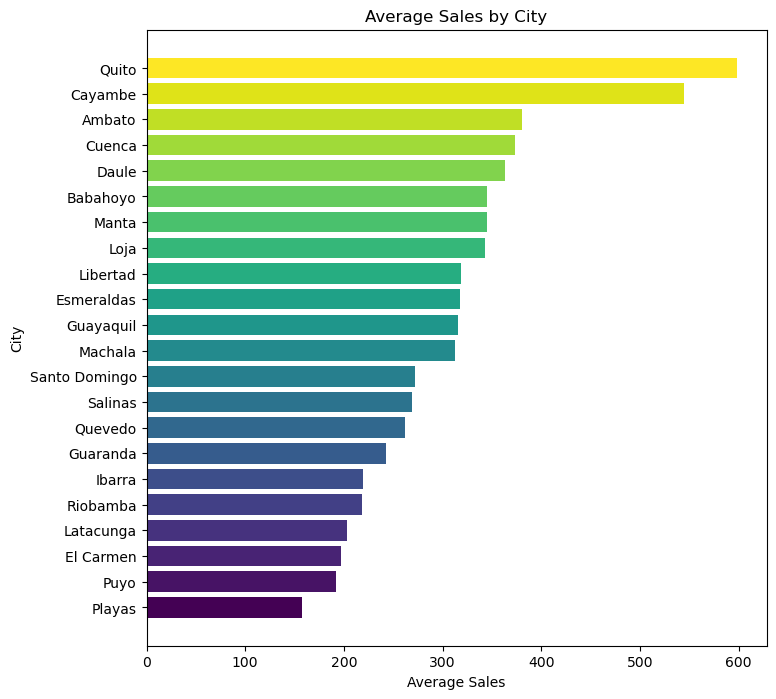

In [35]:
#Average sales by city
# Group by city and calculate the average sales
average_sales_by_city = merged_df.groupby('city')['sales'].mean()

# Sort the data by average sales in ascending order
average_sales_by_city = average_sales_by_city.sort_values(ascending=True)

# Define colors for the bar plot using 'viridis' color palette
colors = cm.viridis(np.linspace(0, 1, len(average_sales_by_city)))

# Plot the average sales by city horizontally
plt.figure(figsize=(8, 8))
plt.barh(average_sales_by_city.index, average_sales_by_city.values, color=colors)
plt.xlabel('Average Sales')
plt.ylabel('City')
plt.title('Average Sales by City')
plt.show()

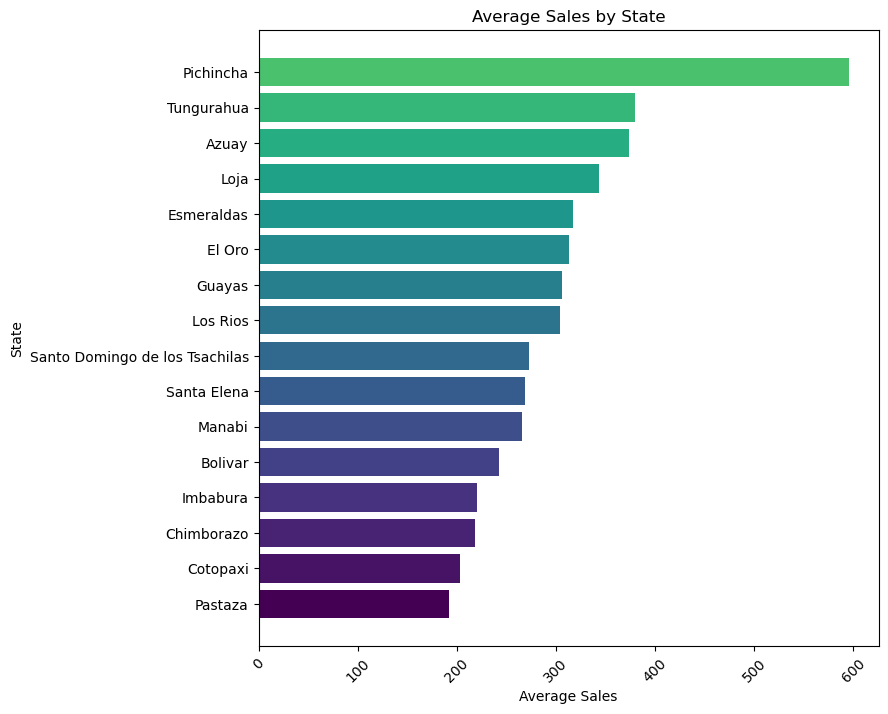

In [36]:
#Average sales by state
# Group by state and calculate the average sales
average_sales_by_state = merged_df.groupby('state')['sales'].mean()

# Sort the data by average sales in descending order
average_sales_by_state = average_sales_by_state.sort_values(ascending=True)

# Plot the average sales by state
plt.figure(figsize=(8, 8))
plt.barh(average_sales_by_state.index, average_sales_by_state.values, color=colors)
plt.xlabel('Average Sales')
plt.ylabel('State')
plt.title('Average Sales by State')
plt.xticks(rotation=45)
plt.show()

In [37]:
merged_df.head(10)

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico
0,73062.0,2013-02-11,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
1,73085.0,2013-02-11,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
2,73084.0,2013-02-11,1.0,"LIQUOR,WINE,BEER",21.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
3,73083.0,2013-02-11,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
4,73082.0,2013-02-11,1.0,LAWN AND GARDEN,3.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
5,73081.0,2013-02-11,1.0,LADIESWEAR,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
6,73080.0,2013-02-11,1.0,HOME CARE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
7,73079.0,2013-02-11,1.0,HOME APPLIANCES,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
8,73078.0,2013-02-11,1.0,HOME AND KITCHEN II,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
9,73077.0,2013-02-11,1.0,HOME AND KITCHEN I,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01


To find the correlation between sales and transaction we need total sales on each date and total transaction on each date

In [38]:
sales_transaction_comb = merged_df.groupby('date')[['sales', 'transactions','dcoilwtico']].sum()
print(sales_transaction_comb)


                    sales  transactions  dcoilwtico
date                                               
2013-01-01    2511.618999         25410     3073.62
2013-02-11  278627.588926       2218326   147261.18
2013-02-12  308800.790912       2369664   147974.64
2013-04-01  428816.447912       2695374   147397.80
2013-04-12  314394.967035       2488299   138487.14
...                   ...           ...         ...
2017-07-24  816564.327096       2808960    82346.22
2017-07-25  713581.632609       2703690    85126.14
2017-08-10  651386.911970       2741112    86498.28
2017-08-11  826373.722022       2955183    86979.42
2017-08-15  762661.935939       2856513    84769.74

[179 rows x 3 columns]


In [39]:
correlation_matrix = sales_transaction_comb[['sales', 'transactions', 'dcoilwtico']].corr()
print(correlation_matrix)


                 sales  transactions  dcoilwtico
sales         1.000000      0.830791    0.159881
transactions  0.830791      1.000000    0.542236
dcoilwtico    0.159881      0.542236    1.000000


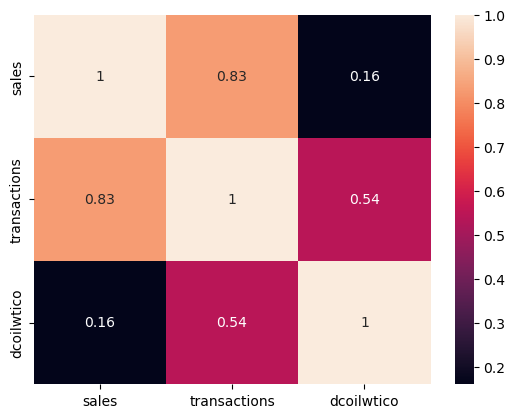

In [40]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()


So good positive correlation exists between sales and number of transactions, as the number of transactions increases, sales also increases.

## Hypothesis 
**Null Hypo (H0)**: The promotional activities do not have a significant impact on store sales for Corporation Favorita.<br>**Alternate Hypo (H1)**: The promotional activities have a significant impact on store sales for Corporation Favorita.

In [41]:
# Extract the relevant variables for the hypothesis test
promo_sales = merged_df[merged_df['onpromotion'] == 1]['sales']
non_promo_sales = merged_df[merged_df['onpromotion'] == 0]['sales']

# Perform a two-sample t-test to compare sales between promotional and non-promotional periods
t_statistic, p_value = ttest_ind(promo_sales, non_promo_sales)


from scipy.stats import ttest_ind

# Extract the relevant variables for the hypothesis test
promo_sales = merged_df[merged_df['onpromotion'] == 1]['sales']
non_promo_sales = merged_df[merged_df['onpromotion'] == 0]['sales']

# Perform a two-sample t-test to compare sales between promotional and non-promotional periods
t_statistic, p_value = ttest_ind(promo_sales, non_promo_sales)

# Print the test result
print("Hypothesis Testing for Promotional Activities:")
print("Null Hypothesis (H0): The promotional activities do not have a significant impact on store sales.")
print("Alternative Hypothesis (H1): The promotional activities have a significant impact on store sales.")
print("-" * 50)
print("Test Statistic:", t_statistic)
print("P-value:", p_value)
print("=" * 50)
if p_value < 0.05:
    print("Reject the null hypothesis. Promotional activities have a significant impact on store sales at Corporation Favorita.")
else:
    print("Fail to reject the null hypothesis. Promotional activities do not have a significant impact on store sales at Corporation Favorita.")

Hypothesis Testing for Promotional Activities:
Null Hypothesis (H0): The promotional activities do not have a significant impact on store sales.
Alternative Hypothesis (H1): The promotional activities have a significant impact on store sales.
--------------------------------------------------
Test Statistic: 68.21684266478505
P-value: 0.0
Reject the null hypothesis. Promotional activities have a significant impact on store sales at Corporation Favorita.


This indicates strong evidence to reject the null hypothesis. Therefore, we can conclude that promotional activities have a significant impact on store sales for Corporation Favorita

### Analyse the impact of earthquake on sales through hypothesis testing

**Null Hypo**: Earthquake does not have a significant impact on sales.<br>**Alternate hypo**: Earthquake have a significant impact on sales 

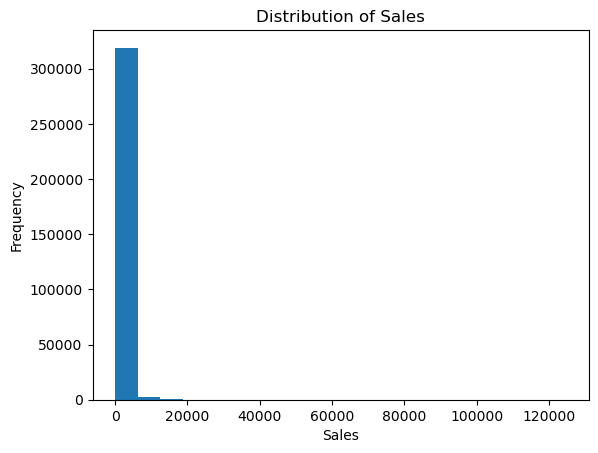

In [42]:
#plotting the sales data to select the appropriate test for hypothesis:
# Histogram
plt.hist(merged_df['sales'], bins=20)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

Clearly sales data is not normally distributed so we will use mann whitney U test


In [43]:
from scipy import stats
# Assign the variable earthquake_date to the date the earthquake took place (April 16, 2016)
earthquake_date = pd.to_datetime('2016-04-16')
# Filter the sales data before and after the earthquake
sales_before_earthquake = merged_df[merged_df['date'] < earthquake_date]['sales']
sales_after_earthquake = merged_df[merged_df['date'] > earthquake_date]['sales']
# Mann-Whitney U test
u_statistic, pval = stats.mannwhitneyu(sales_before_earthquake, sales_after_earthquake)

# Print the test result
print("Hypothesis Testing for earthquake impact:")
print("Null Hypothesis (H0): Earthquake does not have a significant impact on sales")
print("Alternative Hypothesis (H1): Earthquake have a significant impact on sales")
print("-" * 50)
print("Test Statistic:", u_statistic)
print("P-value:", pval)
print("=" * 50)
if pval < 0.05:
    print("Reject the null hypothesis. Earthquake has significant impact on sales")
else:
    print("Fail to reject the null hypothesis. Earthquake does not have significant impact on sales")

Hypothesis Testing for earthquake impact:
Null Hypothesis (H0): Earthquake does not have a significant impact on sales
Alternative Hypothesis (H1): Earthquake have a significant impact on sales
--------------------------------------------------
Test Statistic: 10924498226.0
P-value: 0.0
Reject the null hypothesis. Earthquake has significant impact on sales


### Analysis from the date and its extractable features

In [44]:
# Extracting Date Components
merged_df_copy['date'] = pd.to_datetime(merged_df_copy['date'])
merged_df_copy['year'] = merged_df_copy['date'].dt.year
merged_df_copy['month'] = merged_df_copy['date'].dt.month
merged_df_copy['day'] = merged_df_copy['date'].dt.day
merged_df_copy.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico,year,month,day
0,73062.0,2013-02-11,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11
1,73085.0,2013-02-11,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11
2,73084.0,2013-02-11,1.0,"LIQUOR,WINE,BEER",21.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11
3,73083.0,2013-02-11,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11
4,73082.0,2013-02-11,1.0,LAWN AND GARDEN,3.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11


In [45]:
# Renaming the columns with the approapriate names
merged_df_copy = merged_df_copy.rename(columns={"type_x": "store_type", "type_y": "holiday_type"})
merged_df_copy.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,year,month,day
0,73062.0,2013-02-11,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11
1,73085.0,2013-02-11,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11
2,73084.0,2013-02-11,1.0,"LIQUOR,WINE,BEER",21.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11
3,73083.0,2013-02-11,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11
4,73082.0,2013-02-11,1.0,LAWN AND GARDEN,3.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11


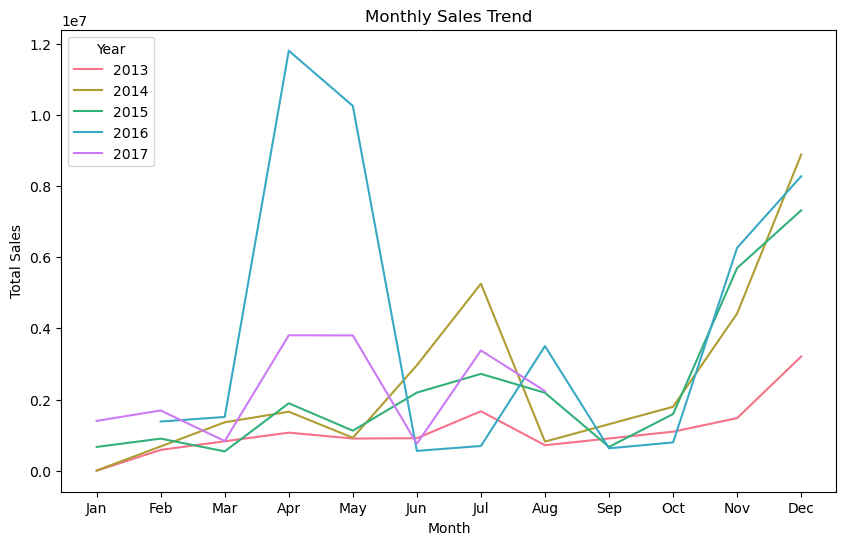

In [46]:
# Set distinct colors for each year
colors = sns.color_palette("husl", n_colors=len(merged_df_copy['year'].unique()))

# Visualize the Monthly Sales Trend
monthly_sales = merged_df_copy.groupby(['year', 'month'])['sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='month', y='sales', hue='year', palette=colors)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

sales starts increasing around march, dips around May-June, july-sept..rises again from october to december.

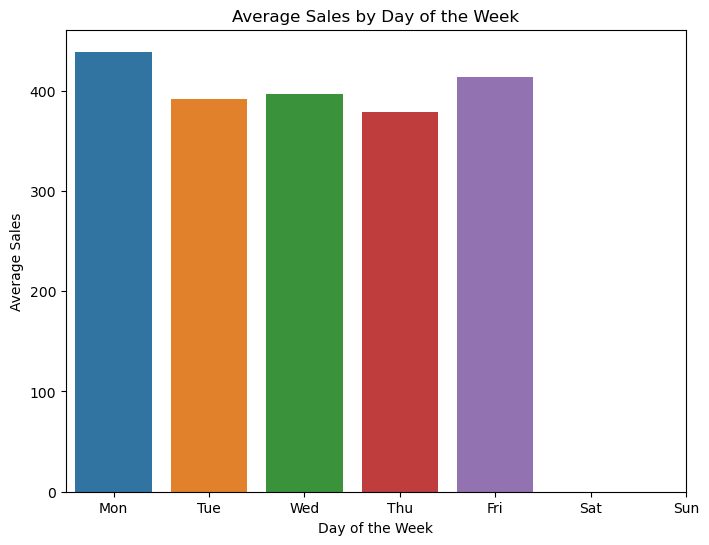

In [47]:
# Visualize the Day of the Week Sales Pattern
merged_df_copy['day_of_week'] = merged_df_copy['date'].dt.dayofweek
day_of_week_sales = merged_df_copy.groupby('day_of_week')['sales'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=day_of_week_sales, x='day_of_week', y='sales')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.xticks(range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

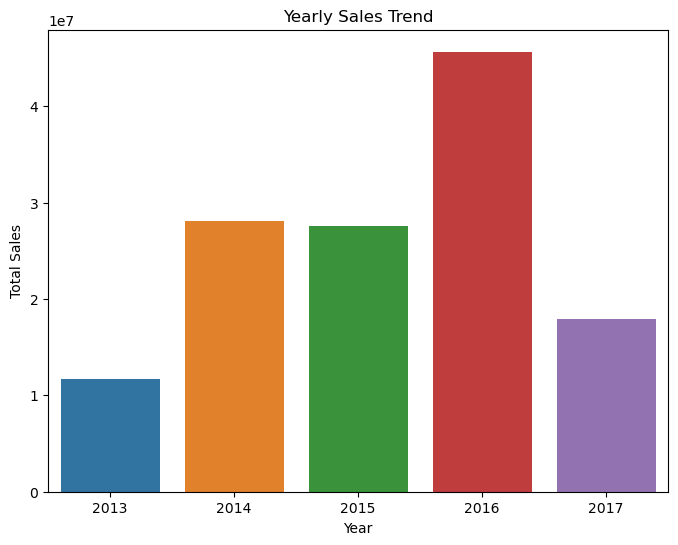

In [48]:
# Visualize the Yearly Sales Trend
yearly_sales = merged_df_copy.groupby('year')['sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=yearly_sales, x='year', y='sales')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

### Prediction through ML models

### Feature engineering

In [49]:
# Extracting Date Components
merged_df_copy['date'] = pd.to_datetime(merged_df_copy['date'])
merged_df_copy['year'] = merged_df_copy['date'].dt.year
merged_df_copy['month'] = merged_df_copy['date'].dt.month
merged_df_copy['day'] = merged_df_copy['date'].dt.day
merged_df_copy.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,holiday_type,locale,locale_name,description,transferred,dcoilwtico,year,month,day,day_of_week
0,73062.0,2013-02-11,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11,0
1,73085.0,2013-02-11,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11,0
2,73084.0,2013-02-11,1.0,"LIQUOR,WINE,BEER",21.0,0.0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11,0
3,73083.0,2013-02-11,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11,0
4,73082.0,2013-02-11,1.0,LAWN AND GARDEN,3.0,0.0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11,0


In [50]:
#dropping unnecessary column
columns_to_drop = ['date','id', 'locale', 'locale_name', 'description', 'store_type', 'transferred', 'state']
merged_df_copy = merged_df_copy.drop(columns=columns_to_drop)

merged_df_copy.head()

,store_nbr,family,sales,onpromotion,city,cluster,transactions,holiday_type,dcoilwtico,year,month,day,day_of_week
0,1.0,AUTOMOTIVE,0.0,0.0,Quito,13,396,Holiday,97.01,2013,2,11,0
1,1.0,MAGAZINES,0.0,0.0,Quito,13,396,Holiday,97.01,2013,2,11,0
2,1.0,"LIQUOR,WINE,BEER",21.0,0.0,Quito,13,396,Holiday,97.01,2013,2,11,0
3,1.0,LINGERIE,0.0,0.0,Quito,13,396,Holiday,97.01,2013,2,11,0
4,1.0,LAWN AND GARDEN,3.0,0.0,Quito,13,396,Holiday,97.01,2013,2,11,0


In [51]:
unique_families = merged_df_copy['family'].unique()
unique_families

array(['AUTOMOTIVE', 'MAGAZINES', 'LIQUOR,WINE,BEER', 'LINGERIE',
       'LAWN AND GARDEN', 'LADIESWEAR', 'HOME CARE', 'HOME APPLIANCES',
       'HOME AND KITCHEN II', 'HOME AND KITCHEN I', 'HARDWARE',
       'GROCERY II', 'MEATS', 'GROCERY I', 'EGGS', 'DELI', 'DAIRY',
       'CLEANING', 'CELEBRATION', 'BREAD/BAKERY', 'BOOKS', 'BEVERAGES',
       'BEAUTY', 'BABY CARE', 'FROZEN FOODS', 'PERSONAL CARE',
       'PLAYERS AND ELECTRONICS', 'PET SUPPLIES', 'SEAFOOD',
       'SCHOOL AND OFFICE SUPPLIES', 'PRODUCE', 'PREPARED FOODS',
       'POULTRY'], dtype=object)

In [52]:
# Define the category lists for each product category
food_families = ['BEVERAGES', 'BREAD/BAKERY', 'FROZEN FOODS', 'MEATS', 'PREPARED FOODS', 'DELI','PRODUCE', 'DAIRY','POULTRY','EGGS','SEAFOOD']
home_families = ['HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES']
clothing_families = ['LINGERIE', 'LADYSWARE']
grocery_families = ['GROCERY I', 'GROCERY II']
stationery_families = ['BOOKS', 'MAGAZINES','SCHOOL AND OFFICE SUPPLIES']
cleaning_families = ['HOME CARE', 'BABY CARE','PERSONAL CARE']
hardware_families = ['PLAYERS AND ELECTRONICS','HARDWARE']

# Categorize the 'family' column based on the product categories
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(food_families), 'FOODS', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(home_families), 'HOME', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(clothing_families), 'CLOTHING', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(grocery_families), 'GROCERY', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(stationery_families), 'STATIONERY', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(cleaning_families), 'CLEANING', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(hardware_families), 'HARDWARE', merged_df_copy['family'])

# Print the updated DataFrame
merged_df_copy.head()

,store_nbr,family,sales,onpromotion,city,cluster,transactions,holiday_type,dcoilwtico,year,month,day,day_of_week
0,1.0,AUTOMOTIVE,0.0,0.0,Quito,13,396,Holiday,97.01,2013,2,11,0
1,1.0,STATIONERY,0.0,0.0,Quito,13,396,Holiday,97.01,2013,2,11,0
2,1.0,"LIQUOR,WINE,BEER",21.0,0.0,Quito,13,396,Holiday,97.01,2013,2,11,0
3,1.0,CLOTHING,0.0,0.0,Quito,13,396,Holiday,97.01,2013,2,11,0
4,1.0,LAWN AND GARDEN,3.0,0.0,Quito,13,396,Holiday,97.01,2013,2,11,0


In [53]:
#feature scaling
# Scaling Numeric Variables (Min-Max Scaling)
# create an instance of StandardScaler
scaler = StandardScaler()

# select numerical columns
num_cols = ['sales', 'transactions', 'dcoilwtico']

# fit and transform the numerical columns
merged_df_copy[num_cols] = scaler.fit_transform(merged_df_copy[num_cols])

# Display the updated dataframe
merged_df_copy.head()

,store_nbr,family,sales,onpromotion,city,cluster,transactions,holiday_type,dcoilwtico,year,month,day,day_of_week
0,1.0,AUTOMOTIVE,-0.325920,0.0,Quito,13,-1.273993,Holiday,1.342694,2013,2,11,0
1,1.0,STATIONERY,-0.325920,0.0,Quito,13,-1.273993,Holiday,1.342694,2013,2,11,0
2,1.0,"LIQUOR,WINE,BEER",-0.309078,0.0,Quito,13,-1.273993,Holiday,1.342694,2013,2,11,0
3,1.0,CLOTHING,-0.325920,0.0,Quito,13,-1.273993,Holiday,1.342694,2013,2,11,0
4,1.0,LAWN AND GARDEN,-0.323514,0.0,Quito,13,-1.273993,Holiday,1.342694,2013,2,11,0


In [54]:
#Encoding the categorical variables
# Define the categorical columns to encode
categorical_columns = ["family", "city", "holiday_type"]

# Perform one-hot encoding
encoder = OneHotEncoder()
one_hot_encoded_data = encoder.fit_transform(merged_df_copy[categorical_columns])

# Create column names for the one-hot encoded data
column_names = encoder.get_feature_names_out(categorical_columns)

# Convert the one-hot encoded data to a DataFrame
merged_df_encoded = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)

# Concatenate the original dataframe with the one-hot encoded data
merged_df_encoded = pd.concat([merged_df_copy, merged_df_encoded], axis=1)

# Drop the original categorical columns
merged_df_encoded.drop(categorical_columns, axis=1, inplace=True)

# Print the head of the encoded DataFrame
merged_df_encoded.head()

,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico,year,month,day,day_of_week,...,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer
0,1.0,-0.325920,0.0,13,-1.273993,1.342694,2013,2,11,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,-0.325920,0.0,13,-1.273993,1.342694,2013,2,11,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,-0.309078,0.0,13,-1.273993,1.342694,2013,2,11,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,-0.325920,0.0,13,-1.273993,1.342694,2013,2,11,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,-0.323514,0.0,13,-1.273993,1.342694,2013,2,11,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
#for test df
# Extracting Date Components
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df.head()

,id,date,store_nbr,family,onpromotion,year,month,day
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16


In [56]:
# Dropping Unnecessary Columns
columns_to_drop = ['date', 'id']
test_df = test_df.drop(columns=columns_to_drop)
test_df.head()

,store_nbr,family,onpromotion,year,month,day
0,1,AUTOMOTIVE,0,2017,8,16
1,1,BABY CARE,0,2017,8,16
2,1,BEAUTY,2,2017,8,16
3,1,BEVERAGES,20,2017,8,16
4,1,BOOKS,0,2017,8,16


In [57]:
# Product Categorization Based on Families
food_families = ['BEVERAGES', 'BREAD/BAKERY', 'FROZEN FOODS', 'MEATS', 'PREPARED FOODS', 'DELI', 'PRODUCE', 'DAIRY', 'POULTRY', 'EGGS', 'SEAFOOD']
home_families = ['HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES']
clothing_families = ['LINGERIE', 'LADYSWARE']
grocery_families = ['GROCERY I', 'GROCERY II']
stationery_families = ['BOOKS', 'MAGAZINES', 'SCHOOL AND OFFICE SUPPLIES']
cleaning_families = ['HOME CARE', 'BABY CARE', 'PERSONAL CARE']
hardware_families = ['PLAYERS AND ELECTRONICS', 'HARDWARE']

test_df['family'] = np.where(test_df['family'].isin(food_families), 'FOODS', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(home_families), 'HOME', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(clothing_families), 'CLOTHING', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(grocery_families), 'GROCERY', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(stationery_families), 'STATIONERY', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(cleaning_families), 'CLEANING', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(hardware_families), 'HARDWARE', test_df['family'])

In [58]:
# Encoding The Categorical Variables
# List of categorical columns to encode
categorical_columns = ["family"]

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Perform one-hot encoding on the 'test_df' data for the specified categorical columns
one_hot_encoded_data = encoder.fit_transform(test_df[categorical_columns])

# Get the column names for the one-hot encoded data
column_names = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame with the one-hot encoded data and corresponding column names
test_df_encoded = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)

# Concatenate the original 'test_df' with the one-hot encoded data
test_df_encoded = pd.concat([test_df, test_df_encoded], axis=1)

# Drop the original categorical columns since they have been encoded
test_df_encoded.drop(categorical_columns, axis=1, inplace=True)

# Display the updated 'test_df_encoded' DataFrame
test_df_encoded.head()

,store_nbr,onpromotion,year,month,day,family_AUTOMOTIVE,family_BEAUTY,family_CELEBRATION,family_CLEANING,family_CLOTHING,family_FOODS,family_GROCERY,family_HARDWARE,family_HOME,family_LADIESWEAR,family_LAWN AND GARDEN,"family_LIQUOR,WINE,BEER",family_PET SUPPLIES,family_STATIONERY
0,1,0,2017,8,16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,2017,8,16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,2017,8,16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,20,2017,8,16,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,2017,8,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Modelling

In [59]:
merged_df_encoded['year'].value_counts()

year
2016    99198
2014    73524
2015    65901
2013    46266
2017    37158
Name: count, dtype: int64

In [60]:
train_set = merged_df_encoded.loc[merged_df_encoded['year'].isin([2013, 2014, 2015, 2016])]
eval_set = merged_df_encoded.loc[merged_df_encoded['year'] == 2017]

In [61]:
print(train_set.shape)
print(eval_set.shape)

(284889, 51)
(37158, 51)


In [62]:
# Separate the target variable and features for training and testing
X_train = train_set.drop('sales', axis=1)
y_train = train_set['sales'] 


X_eval = eval_set.drop('sales', axis=1)  
y_eval = eval_set['sales']

### Model 1 Polynomial regression

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [64]:
poly = PolynomialFeatures(degree=1)

# Transform the training and evaluation features to include polynomial terms
X_train_poly = poly.fit_transform(X_train)
X_eval_poly = poly.transform(X_eval)  # Use the same fitted transformer


In [65]:
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_poly, y_train)

# Make predictions on the evaluation data
y_pred_eval = model.predict(X_eval_poly)

# Evaluate the model performance on the evaluation data
mse = mean_squared_error(y_eval, y_pred_eval)
print("Mean Squared Error on evaluation data:", mse)

Mean Squared Error on evaluation data: 0.7019890111836469


In [66]:
# Initialize the results dataframe
results_df = pd.DataFrame(columns=['Model', 'RMSLE', 'RMSE', 'MSE', 'MAE'])

In [67]:
# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_eval)

# Calculate metrics
rf_mse = mean_squared_error(y_eval, rf_predictions)
rf_mae = mean_absolute_error(y_eval, rf_predictions)

# Apply the absolute value function to both y_eval and rf_predictions
y_eval_abs = abs(y_eval)
rf_predictions_abs = abs(rf_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
rf_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, rf_predictions_abs))

# Create a DataFrame to store results for Random Forest
results_rf = pd.DataFrame({'Model': ['Random Forest'],
                            'RMSLE': [rf_rmsle],
                            'RMSE': [np.sqrt(rf_mse)],
                            'MSE': [rf_mse],
                            'MAE': [rf_mae]}).round(2)

# Print the results_rf dataframe
results_rf

,Model,RMSLE,RMSE,MSE,MAE
0,Random Forest,0.22,0.71,0.51,0.24


In [68]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [69]:
# Define and train the HistGradientBoostingRegressor model
hg_model = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1)
hg_model.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [70]:


# Make predictions on the evaluation data
hg_predictions = hg_model.predict(X_eval)

# Calculate metrics
hg_mse = mean_squared_error(y_eval, hg_predictions)
hg_mae = mean_absolute_error(y_eval, hg_predictions)

# Apply the absolute value function to both y_eval and hg_predictions
y_eval_abs = abs(y_eval)
hg_predictions_abs = abs(hg_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
hg_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, hg_predictions_abs))

# Create a DataFrame to store results for Random Forest
results_hg = pd.DataFrame({'Model': ['Hist gardient boost'],
                            'RMSLE': [hg_rmsle],
                            'RMSE': [np.sqrt(hg_mse)],
                            'MSE': [hg_mse],
                            'MAE': [hg_mae]}).round(2)

# Print the results_rf dataframe
results_hg


,Model,RMSLE,RMSE,MSE,MAE
0,Hist gardient boost,0.22,0.62,0.39,0.26


### Time series forecasting models

To apply ARIMA we need to extract each family daily sails and then apply it.

In [71]:
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico
0,73062.0,2013-02-11,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
1,73085.0,2013-02-11,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
2,73084.0,2013-02-11,1.0,"LIQUOR,WINE,BEER",21.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
3,73083.0,2013-02-11,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
4,73082.0,2013-02-11,1.0,LAWN AND GARDEN,3.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01


In [72]:
train_df['family'].nunique()

33

In [73]:
# Group the data by product family and calculate the total sales
family_sales = merged_df.groupby('family')['sales'].sum().sort_values(ascending=False)


# Select the top 10 product families
top_10_families = family_sales.head(10)



In [74]:
top_10_families.head(10)

family
GROCERY I        4.197371e+07
BEVERAGES        2.606395e+07
PRODUCE          1.608510e+07
CLEANING         1.118853e+07
DAIRY            7.496803e+06
BREAD/BAKERY     4.658867e+06
POULTRY          3.814823e+06
MEATS            3.670507e+06
PERSONAL CARE    2.869735e+06
DELI             2.762202e+06
Name: sales, dtype: float64

Now we wll predict sales for some of  these top 10 families individually

In [75]:
grocery_all_stor= train_df[train_df['family']=='GROCERY I']
grocery_all_stor.head()

,id,date,store_nbr,family,sales,onpromotion
1200,1200.0,2013-01-01,42.0,GROCERY I,0.0,0.0
1134,1134.0,2013-01-01,40.0,GROCERY I,0.0,0.0
1167,1167.0,2013-01-01,41.0,GROCERY I,0.0,0.0
1299,1299.0,2013-01-01,45.0,GROCERY I,0.0,0.0
1332,1332.0,2013-01-01,46.0,GROCERY I,0.0,0.0


In [76]:
grocery_daily_sales = grocery_all_stor.groupby('date')['sales'].sum()
grocery_daily_sales.head()

date
2013-01-01       700.0
2013-01-02    202020.0
2013-01-03    144878.0
2013-01-04    135754.0
2013-01-05    188356.0
Name: sales, dtype: float64

In [77]:
grocery_daily_sales.index.name

'date'

In [78]:
grocery_df = pd.DataFrame({'date': grocery_daily_sales.index, 'grocery_sales': grocery_daily_sales.values})

In [79]:
grocery_df.head()

,date,grocery_sales
0,2013-01-01,700.0
1,2013-01-02,202020.0
2,2013-01-03,144878.0
3,2013-01-04,135754.0
4,2013-01-05,188356.0


In [80]:
grocery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1684 non-null   datetime64[ns]
 1   grocery_sales  1684 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.4 KB


In [81]:
# Assuming you have created 'grocery_df' using one of the methods from the previous response

grocery_df = grocery_df.set_index('date')


In [82]:
grocery_df.head()

,grocery_sales
date,
2013-01-01,700.0
2013-01-02,202020.0
2013-01-03,144878.0
2013-01-04,135754.0
2013-01-05,188356.0


In [83]:
grocery_df.tail()

,grocery_sales
date,
2017-08-11,238221.922
2017-08-12,238627.633
2017-08-13,258442.452
2017-08-14,225355.694
2017-08-15,224208.125


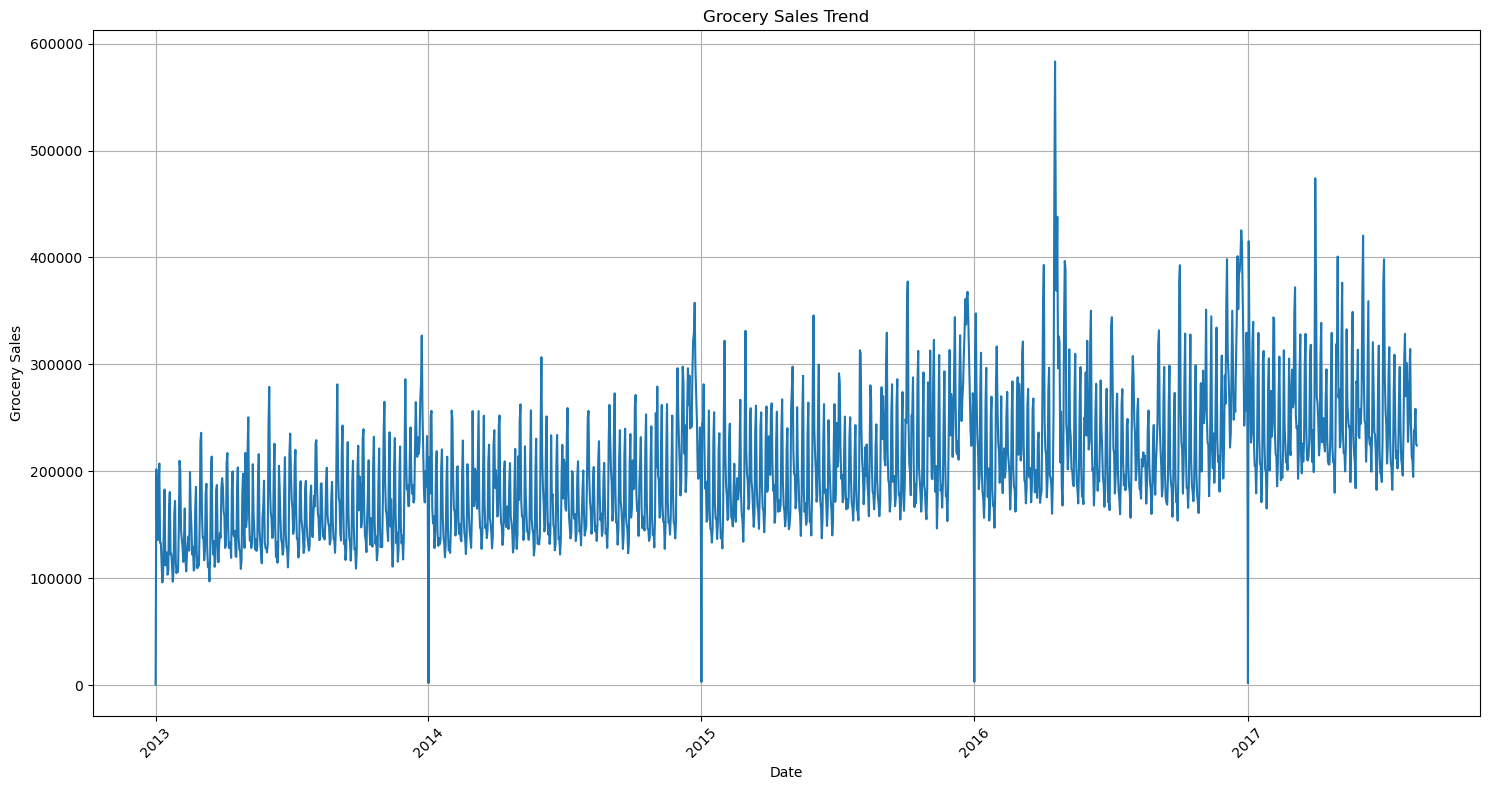

In [84]:
#plotting the grocery_sales to judge trend/seasonality
# Resample data (optional, adjust frequency as needed)
daily_sales = grocery_df['grocery_sales']  # Select the sales column


# Plotting the time series
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
plt.plot(daily_sales)  # Use resampled_sales for monthly data (or daily_sales for daily data)

# Customize the plot for better readability
plt.xlabel('Date')
plt.ylabel('Grocery Sales')
plt.title('Grocery Sales Trend')

# Optional: Add gridlines and rotate x-axis labels (if many dates)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability with many dates

# Show the plot
plt.tight_layout()  # Adjust spacing between elements
plt.show()

In [85]:
#testing statioanrity with ADF test
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
  # Perform the Dickey-Fuller test
  adf_result = adfuller(timeseries)
  # Print the test statistic, p-value, etc.
  print(f"ADF Statistic: {adf_result[0]}")
  print(f"p-value: {adf_result[1]}")
  # Print whether p-value is less than significance level (e.g., 0.05)
  print(f"Is stationary: {'Yes' if adf_result[1] < 0.05 else 'No'}")

# Apply the test to your resampled_sales (or daily_sales)
test_stationarity(daily_sales)  


ADF Statistic: -3.4487626387912567
p-value: 0.009404710878352256
Is stationary: Yes


So data is stationary. no trend and seasonality

In [79]:
grocery_df.head()

,grocery_sales
date,
2013-01-01,700.0
2013-01-02,202020.0
2013-01-03,144878.0
2013-01-04,135754.0
2013-01-05,188356.0


In [86]:
grocery_df.tail()

,grocery_sales
date,
2017-08-11,238221.922
2017-08-12,238627.633
2017-08-13,258442.452
2017-08-14,225355.694
2017-08-15,224208.125


splitting into grocery_df into train and test, we will take data upto 1 jul 2017 for training and after this date will be taken for test, then we will calculate different result parametrs

In [87]:
# Split the data into training and testing sets
train_end_date = '2017-07-15'

In [88]:
grocery_train_df = grocery_df[grocery_df.index <= train_end_date]
grocery_test_df = grocery_df[grocery_df.index > train_end_date]

Plotting ACF and PACF plot 

In [92]:
grocery_train_df.head()

,grocery_sales
date,
2013-01-01,700.0
2013-01-02,202020.0
2013-01-03,144878.0
2013-01-04,135754.0
2013-01-05,188356.0


In [95]:
grocery_train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1653 entries, 2013-01-01 to 2017-07-15
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   grocery_sales  1653 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


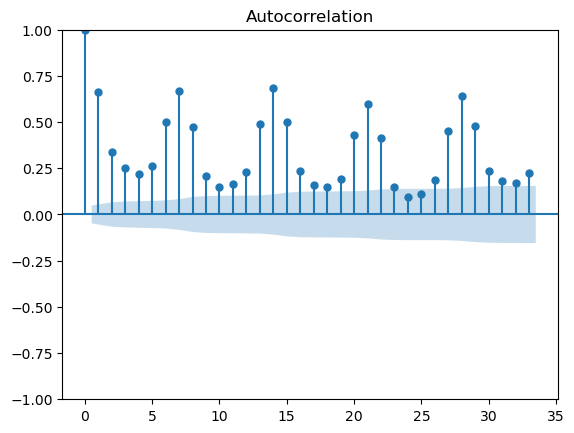

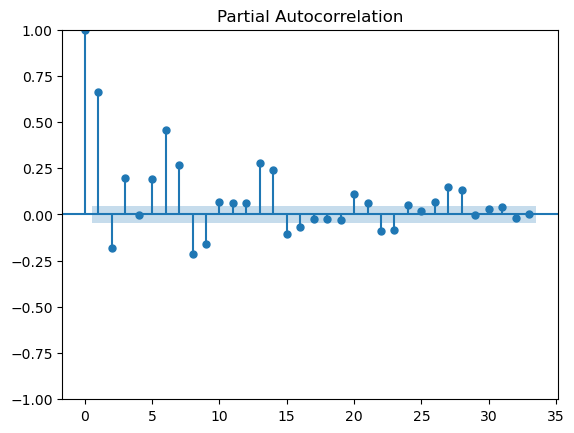

In [96]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF
plot_acf(grocery_train_df['grocery_sales'])
plt.show()

# Plot PACF
plot_pacf(grocery_train_df['grocery_sales'])
plt.show()


So ADF test suggested that data is stationary hence it does not thave any trend and by analyzing ACF and PACF plot we can come to conclusion that data has seasonality of period 6 (weakly)

### Building SARIMA model

In [97]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
# Define parameter ranges
p_range = range(1, 9)
d = 0
q = 0
P = 1
D_range = range(1, 4)
Q = 0
s = 7

# Suppress warnings for clarity
warnings.filterwarnings("ignore")

# Initialize an empty list to store results
results = []
# Grid search for parameter combinations
for p in p_range:
    for D in D_range:
        try:
            model = SARIMAX(grocery_train_df['grocery_sales'],
                            order=(p, d, q),
                            seasonal_order=(P, D, Q, s),
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            fit_results = model.fit(disp=False)
            results.append((p, d, q, P, D, Q, s, fit_results.aic))
        except:
            continue
# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'P', 'D', 'Q', 's', 'AIC'])

# Find the best model
best_model = results_df.loc[results_df['AIC'].idxmin()]

print(f"Best model parameters: p={best_model['p']}, d={best_model['d']}, q={best_model['q']}, P={best_model['P']}, D={best_model['D']}, Q={best_model['Q']}, s={best_model['s']}")
print(f"AIC: {best_model['AIC']}")


Best model parameters: p=6.0, d=0.0, q=0.0, P=1.0, D=1.0, Q=0.0, s=7.0
AIC: 38882.618233000445


In [98]:
results_df

,p,d,q,P,D,Q,s,AIC
0,1,0,0,1,1,0,7,39046.882437
1,1,0,0,1,2,0,7,40365.739868
2,1,0,0,1,3,0,7,252336.260674
3,2,0,0,1,1,0,7,39016.638751
4,2,0,0,1,2,0,7,40339.108487
5,2,0,0,1,3,0,7,252293.838735
6,3,0,0,1,1,0,7,38987.092339
7,3,0,0,1,2,0,7,40313.081116
8,3,0,0,1,3,0,7,252268.269029
9,4,0,0,1,1,0,7,38958.969498


In [104]:
# Fit the best model
best_sarima_model = SARIMAX(grocery_train_df['grocery_sales'],
                            order=(int(best_model['p']), int(best_model['d']), int(best_model['q'])),
                            seasonal_order=(int(best_model['P']), int(best_model['D']), int(best_model['Q']), int(best_model['s'])),
                            enforce_stationarity=True,
                            enforce_invertibility=True)
#best_sarima_results = best_sarima_model.fit()



Testing the prediction on grocery_test_df

In [105]:
X_val = grocery_test_df.drop('grocery_sales', axis=1)

In [109]:
# Assuming you have best_sarima_model (the trained model) and X_val (validation data features)

# Fit the best model
best_model_fit = best_sarima_model.fit()

# Specify the number of steps to predict (adjust as needed)
forecast_steps = 31

# Make predictions using forecast
predictions = best_model_fit.forecast(steps=forecast_steps)

# Print the predicted grocery sales
print(predictions)


1653    328269.735707
1654    246410.664547
1655    220373.877017
1656    215728.555629
1657    188358.677102
1658    215143.576611
1659    283279.546711
1660    322056.000573
1661    241263.937128
1662    214789.902352
1663    210039.793013
1664    186057.781951
1665    212847.406871
1666    279928.411057
1667    325528.260844
1668    244093.446569
1669    217780.018306
1670    213043.724127
1671    187263.482419
1672    214041.172958
1673    281675.999157
1674    323680.355080
1675    242587.816683
1676    216194.139224
1677    211453.561756
1678    186623.731519
1679    213409.644851
1680    280753.835926
1681    324654.267101
1682    243381.676221
1683    217030.471856
Name: predicted_mean, dtype: float64


In [121]:
y_df = grocery_test_df.reset_index()

In [122]:
y_df.head()

,date,grocery_sales
0,2017-07-16,309084.549
1,2017-07-17,241417.015
2,2017-07-18,211924.156
3,2017-07-19,218927.014
4,2017-07-20,202736.576


In [123]:
y_true_val= y_df['grocery_sales']
print(y_true_val)

0     309084.549
1     241417.015
2     211924.156
3     218927.014
4     202736.576
5     217576.952
6     269126.244
7     297691.697
8     240691.265
9     210986.016
10    205754.648
11    196079.180
12    233685.813
13    303657.532
14    328519.734
15    270215.666
16    301453.492
17    281631.338
18    227658.804
19    244474.234
20    292312.398
21    314408.414
22    244548.234
23    213902.289
24    210097.703
25    194854.086
26    238221.922
27    238627.633
28    258442.452
29    225355.694
30    224208.125
Name: grocery_sales, dtype: float64


In [127]:
y_true_val.tail()

26    238221.922
27    238627.633
28    258442.452
29    225355.694
30    224208.125
Name: grocery_sales, dtype: float64

In [124]:
predictions=predictions.reset_index()
print(predictions.tail())

    index  predicted_mean
26   1679   213409.644851
27   1680   280753.835926
28   1681   324654.267101
29   1682   243381.676221
30   1683   217030.471856


In [131]:

# Calculate evaluation metrics
sarima_mse = mean_squared_error(y_true_val, predictions['predicted_mean'])
# Apply the absolute value function to y_eval to remove negative signs
y_val_abs = abs(y_true_val)
sarima_predictions_abs = abs(predictions['predicted_mean'])
sarima_rmsle = np.sqrt(mean_squared_log_error(y_val_abs, sarima_predictions_abs))
'''arima_rmse = np.sqrt(arima_mse)

# Apply the absolute value function to y_eval to remove negative signs
y_eval_abs = abs(y_eval)
arima_predictions_abs = abs(arima_predictions)

# Calculate the Mean Absolute Error (MAE)
arima_mae = mean_absolute_error(y_eval, arima_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
arima_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, arima_predictions_abs))
# Create a DataFrame to store results for ARIMA
results_arima = pd.DataFrame({'Model': ['ARIMA'],
                            'RMSLE': [arima_rmsle],
                            'RMSE': [np.sqrt(arima_mse)],
                            'MSE': [arima_mse],
                            'MAE': [arima_mae]}).round(2)

# Print the results_arima dataframe
results_arima'''

"arima_rmse = np.sqrt(arima_mse)\n\n# Apply the absolute value function to y_eval to remove negative signs\ny_eval_abs = abs(y_eval)\narima_predictions_abs = abs(arima_predictions)\n\n# Calculate the Mean Absolute Error (MAE)\narima_mae = mean_absolute_error(y_eval, arima_predictions)\n\n# Calculate the Root Mean Squared Logarithmic Error (RMSLE)\narima_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, arima_predictions_abs))\n# Create a DataFrame to store results for ARIMA\nresults_arima = pd.DataFrame({'Model': ['ARIMA'],\n                            'RMSLE': [arima_rmsle],\n                            'RMSE': [np.sqrt(arima_mse)],\n                            'MSE': [arima_mse],\n                            'MAE': [arima_mae]}).round(2)\n\n# Print the results_arima dataframe\nresults_arima"

In [133]:
sarima_mse

806303181.7874857

In [132]:
sarima_rmsle

0.11226055835569579

mse is huge but rmsle is very small

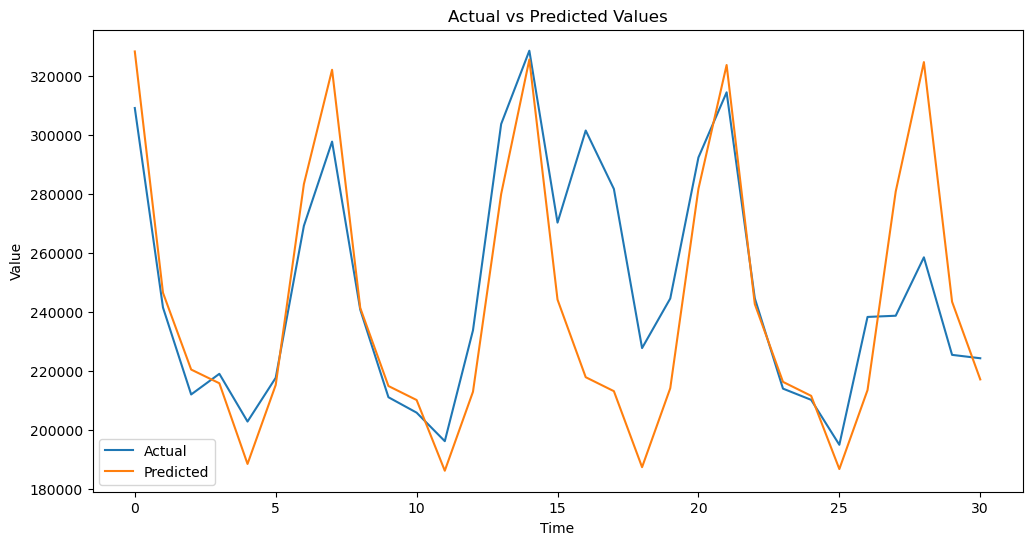

In [130]:
#import matplotlib.pyplot as plt

# Assuming y_true and predictions are NumPy arrays or Pandas Series

plt.figure(figsize=(12, 6))
plt.plot(y_true_val, label='Actual')
plt.plot(predictions['predicted_mean'], label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.show()


In [137]:
print(grocery_df['grocery_sales'].max(),grocery_df['grocery_sales'].min())

583222.48 700.0


Understanding the Values
MSE (806303181.7874857): This indicates a large average squared error between your predicted and actual values. The magnitude is quite high, suggesting potential issues with  model or data.
RMSLE (0.11): This value suggests that on average, the logarithm of your predicted values is about 11% off from the logarithm of the actual values. While this might seem low, but grocery_sales range lie in 700-583222.48 so it need to be seen in this perspective

Residuals look randomely distributed, let us check Ljung box test to confirm it.

Fitting Auto arima

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima


In [138]:
grocery_train_df.head()

,grocery_sales
date,
2013-01-01,700.0
2013-01-02,202020.0
2013-01-03,144878.0
2013-01-04,135754.0
2013-01-05,188356.0


In [145]:
# Fit auto SARIMA model
model_auto = auto_arima(grocery_train_df['grocery_sales'],
                   seasonal=True,
                   m=7,  # seasonal period (weekly data)
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Print model summary
print(model_auto.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=7.55 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=40471.444, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=39937.137, Time=0.53 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=40163.864, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=40469.462, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=40473.429, Time=0.18 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=39735.370, Time=1.04 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=39634.740, Time=2.00 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=39637.918, Time=1.03 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=39634.435, Time=3.59 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=39635.262, Time=3.08 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=39688.409, Time=2.60 sec
 ARIMA(2,1,0)(2,0,2)[7] intercept   : AIC=39464.922, Time=3.58 sec
 ARIMA(2,1,0)(1,0,2)[7] intercept   : AIC=39469.106, Time=2.10 sec
 ARIMA(2,1,0)(2,0,1)[7] i

In [154]:
auto_forecast_ = model_auto.predict(n_periods=31)

In [155]:
auto_forecast_=auto_forecast_.reset_index()

In [156]:
auto_forecast_.tail()

,index,0
26,1679,235450.524659
27,1680,303458.166766
28,1681,324585.320182
29,1682,256201.584966
30,1683,239798.232313


In [159]:
auto_forecast_[0]

0     310307.743219
1     239824.467387
2     222362.723045
3     220077.314601
4     197494.006054
5     223542.770138
6     291921.115621
7     315148.246665
8     239936.270249
9     221274.827604
10    219514.954627
11    198914.986571
12    225690.233047
13    298277.501987
14    320133.093389
15    247642.500876
16    230062.825774
17    227175.898056
18    205405.308818
19    230587.600324
20    297064.478319
21    319185.253944
22    248497.472137
23    231305.681689
24    229666.608849
25    210048.276337
26    235450.524659
27    303458.166766
28    324585.320182
29    256201.584966
30    239798.232313
Name: 0, dtype: float64

In [160]:
# Calculate evaluation metrics
autoarima_mse = mean_squared_error(y_true_val, auto_forecast_[0])
# Apply the absolute value function to y_eval to remove negative signs
y_val_abs = abs(y_true_val)
autoarima_predictions_abs = abs(auto_forecast_[0])
autoarima_rmsle = np.sqrt(mean_squared_log_error(y_val_abs, autoarima_predictions_abs))

In [161]:
autoarima_mse

693101441.3423452

In [162]:
autoarima_rmsle

0.10073987064515458

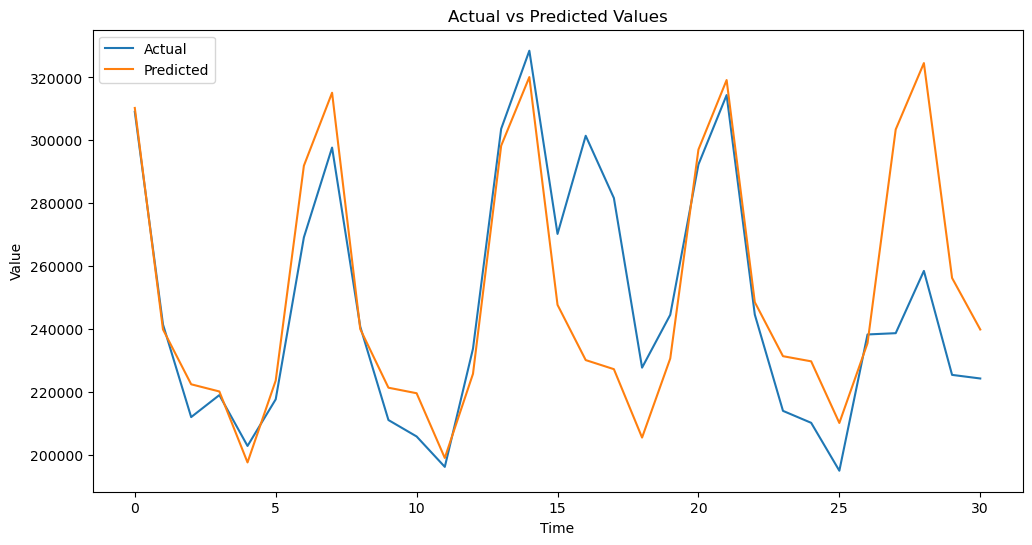

In [163]:
#import matplotlib.pyplot as plt

# Assuming y_true and predictions are NumPy arrays or Pandas Series

plt.figure(figsize=(12, 6))
plt.plot(y_true_val, label='Actual')
plt.plot(auto_forecast_[0], label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.show()


In [164]:
# Define the parameter grid for tuning the random forest model
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', 0.5]
}

# Create Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_grid_rf,
                                      n_iter=10, scoring='neg_mean_squared_error', cv=5,
                                      n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the data
random_search_rf.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_rf_model = random_search_rf.best_estimator_
best_rf_params = random_search_rf.best_params_

# Make predictions using the best model
best_rf_predictions = best_rf_model.predict(X_eval)

# Calculate metrics for the best model
best_rf_mse = mean_squared_error(y_eval, best_rf_predictions)
best_rf_rmse = np.sqrt(best_rf_mse)
best_rf_mae = mean_absolute_error(y_eval, best_rf_predictions)

# Apply absolute value to both predicted and target values
abs_best_rf_predictions = np.abs(best_rf_predictions)
abs_y_eval = np.abs(y_eval)

# Calculate RMSLE using the absolute values
best_rf_rmsle = np.sqrt(mean_squared_log_error(abs_y_eval, abs_best_rf_predictions))

# Create a DataFrame to store results for the best Random Forest model
best_results_rf = pd.DataFrame({'Model': ['Best Random Forest'],
                                'RMSLE': [best_rf_rmsle],
                                'RMSE': [best_rf_rmse],
                                'MSE': [best_rf_mse],
                                'MAE': [best_rf_mae]}).round(2)

# Print the best_results_rf dataframe
best_results_rf